In [24]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from random import randint
from time import sleep

In [25]:
secrets_file = open("secrets.txt","r")
string = secrets_file.read()
string.split('\n')
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [26]:
secrets_dict

{'Client ID': 'd9dda3bf70ac46268e3dec15ffe8c519',
 'Client Secret': 'eddafbd13aea49edab1b6e63e871966d'}

In [27]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['Client ID'],
                                                           client_secret=secrets_dict['Client Secret']))

In [ ]:
# we will use our 'first paid music' playlist as an example:
#playlist = sp.user_playlist_tracks("spotify", "1UV8OzKszYVhBHoyUAuSvV")

In [ ]:
#playlist

In [ ]:
len(playlist)

In [ ]:
playlist = sp.user_playlist_tracks("spotify", "4rnleEAOdmFAbRcNCgZMpY")
len(playlist)

In [ ]:
def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [ ]:
# all_tracks = get_playlist_tracks("0BUNSGihi2mrhQu3fPcVim")
# len(all_tracks)

In [ ]:
new_tracks = get_playlist_tracks('0BUNSGihi2mrhQu3fPcVim')
len(new_tracks)

In [ ]:
#new_tracks

In [ ]:
def uris(new_tracks):
    uris = [new_tracks[i]['track']['uri'] for i in range(len(new_tracks))]
    return uris
uris = uris(new_tracks)


In [ ]:
len(uris)

In [ ]:
df_all_uris = pd.DataFrame(uris, columns=['uri'])   
df_all_uris.shape

In [ ]:
def all_track_names(all_tracks):
    names = [all_tracks[i]['track']['name'] for i in range(len(all_tracks))]      #tracks
    return names
all_track_names = all_track_names(all_tracks)


In [ ]:
df_all_tracks = pd.DataFrame(all_track_names, columns=['tracks'])      #uris data frame
df_all_tracks.shape

In [ ]:
def all_artists(all_tracks):
    artist = [all_tracks[i]['track']['artists'][0]['name'] for i in range(len(all_tracks))]    #artists
    return artist  
all_artists = all_artists(all_tracks)


In [ ]:
artists_df = pd.DataFrame(all_artists, columns=['artist'])         #artitst data frame
artists_df.shape

In [ ]:
features = [sp.audio_features(i) for i in (uris)]

In [ ]:
features

In [ ]:
flat_list = [x for item in features for x in item ]      
flat_list

In [ ]:
danceability = [item['danceability'] for item in flat_list]
energy = [item['energy'] for item in flat_list]
key = [item['key'] for item in flat_list]
loudness = [item['loudness'] for item in flat_list]
mode = [item['mode'] for item in flat_list]
speechiness = [item['speechiness'] for item in flat_list]
acousticness = [item['acousticness'] for item in flat_list]
instrumentalness = [item['instrumentalness'] for item in flat_list]
liveness = [item['liveness'] for item in flat_list]
valence = [item['valence'] for item in flat_list]
tempo = [item['tempo'] for item in flat_list]

In [ ]:
# attributes = ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
# for attr in attributes:
#     attr = [item[attr] for item in flat_list]

In [ ]:
features_df = pd.DataFrame.from_dict({'danceability':danceability, 'energy':energy, 'key':key, 'loudness':loudness, 'mode':mode, 'speechiness':speechiness, 'acousticness':acousticness, 'instrumentalness':instrumentalness, 'liveness':liveness, 'valence':valence, 'tempo':tempo})
features_df.head()


In [ ]:
# CONCATINATE ALL DATAFRAMES
overall_df = pd.concat([artists_df,df_all_tracks,df_all_uris,features_df], axis = 1)
#overall_df.to_csv('E:\\SKUL\\PROGRAMMING_SKULS\\ironhack\\COURSE\\UNIT_6\\GMOD.csv')
overall_df.head()

# GNOD PROJECT

### Drop the Non-numerical columns or simply use the features dataframe

In [ ]:
#overall_df = overall_df.drop([])

In [2]:
#import pandas as pd
overall_df = pd.read_csv('E:\\SKUL\\PROGRAMMING_SKULS\\ironhack\\COURSE\\UNIT_6\\GMOD.csv')
overall_df = overall_df.drop(['Unnamed: 0'], axis =1)
overall_df.head()

,artist,tracks,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,The Muppets,Rainbow Connection,spotify:track:1SJ4ycWow4yz6z4oFz8NAG,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936
1,Israel Kamakawiwo'ole,Somewhere Over The Rainbow_What A Wonderful World,spotify:track:25U7raB3ZSszayTYClh4hF,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005
2,Joey Ramone,What a Wonderful World,spotify:track:04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044
3,Asaf Avidan & the Mojos,One Day / Reckoning Song (Wankelmut Remix) [Ra...,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012
4,Louis Armstrong,What A Wonderful World - Single Version,spotify:track:2pp3RfqX5cb1BAnmNi4Nej,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894


In [3]:
features_df = overall_df.drop(['artist','tracks','uri'], axis =1)
features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936
1,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005
2,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044
3,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012
4,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894


In [4]:
scaler= StandardScaler().fit(features_df)
X_prep = scaler.transform(features_df)
X_prep

array([[-0.14448912, -0.95226344,  1.1193953 , ..., -0.39596108,
        -1.17030975, -0.2607122 ],
       [ 0.73637736, -2.0075736 , -1.44658697, ...,  1.05831626,
         0.71252602, -1.30986901],
       [-0.81317608,  1.05067216, -0.02104126, ...,  0.06816999,
        -0.0212558 , -1.34246542],
       ...,
       [ 0.13198722, -1.15040331, -0.02104126, ...,  0.90979432,
         1.29713242,  1.56522972],
       [ 1.18002544,  0.55962989,  1.40450444, ...,  0.8169681 ,
         0.7407484 ,  0.28481136],
       [-1.54615987, -1.11163681, -0.30615041, ..., -0.14842451,
        -1.38399347,  2.11740145]])

In [5]:
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=5, random_state=1234)

In [6]:
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    184
1    184
2    299
3    105
4     41
dtype: int64

In [7]:
kmeans = KMeans(n_clusters=5,
                init="random",
                n_init=30,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

5750.007087670572


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

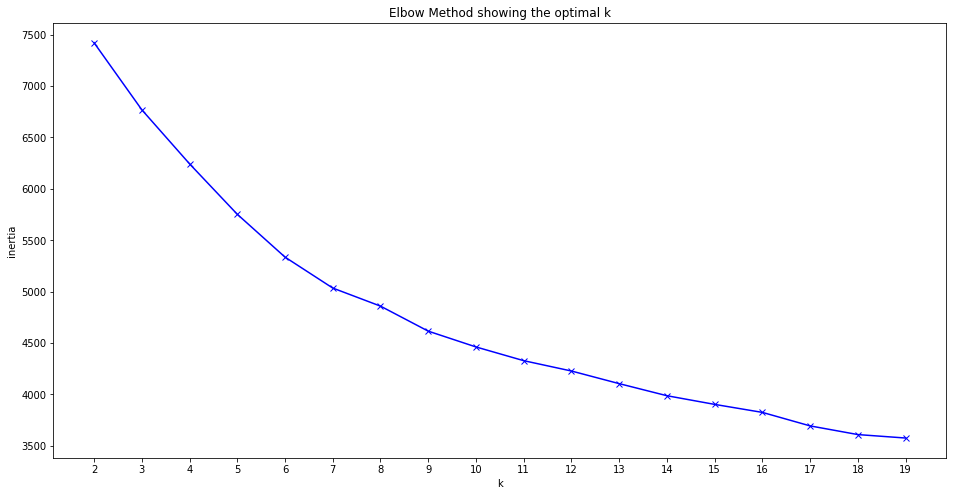

In [8]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

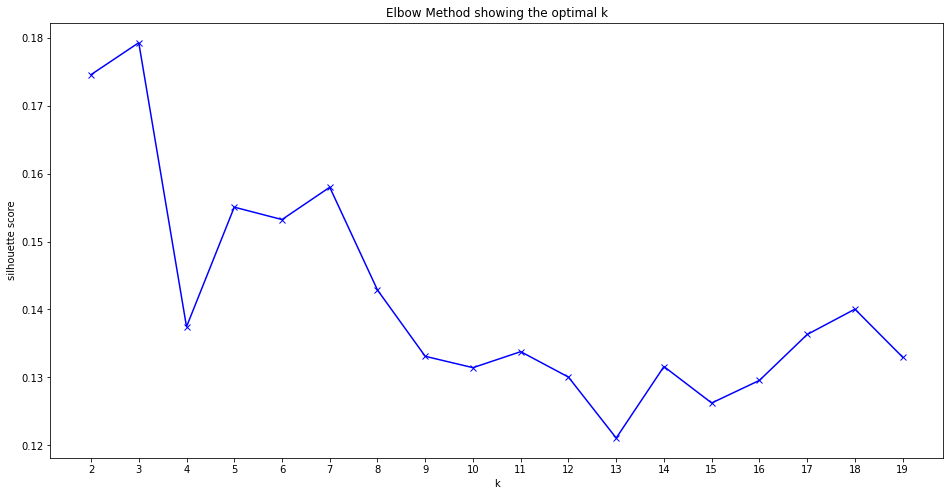

In [9]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [10]:
from sklearn import cluster

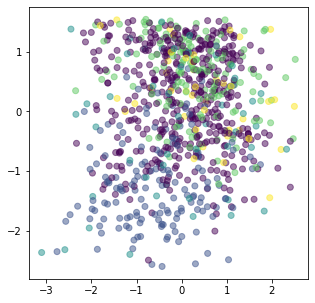

In [11]:
# ward linkage tends to produce relatively equally sized clusters
agglomerative = cluster.AgglomerativeClustering(n_clusters=5,linkage='ward')
pred = agglomerative.fit_predict(X_prep)

plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
plt.show()

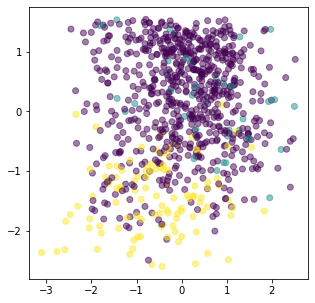

In [12]:
# ward linkage tends to produce relatively equally sized clusters
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='complete')
pred = agglomerative.fit_predict(X_prep)

plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
plt.show()

In [13]:
df_with_cluster = pd.concat([overall_df[['artist','tracks','uri']],features_df,pd.Series(clusters)], axis =1)
df_with_cluster = df_with_cluster.rename(columns={0:'cluster_id'})
df_with_cluster.head()
#df.rename(columns={"A": "a", "B": "c"})

,artist,tracks,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_id
0,The Muppets,Rainbow Connection,spotify:track:1SJ4ycWow4yz6z4oFz8NAG,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936,1
1,Israel Kamakawiwo'ole,Somewhere Over The Rainbow_What A Wonderful World,spotify:track:25U7raB3ZSszayTYClh4hF,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005,1
2,Joey Ramone,What a Wonderful World,spotify:track:04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044,2
3,Asaf Avidan & the Mojos,One Day / Reckoning Song (Wankelmut Remix) [Ra...,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012,0
4,Louis Armstrong,What A Wonderful World - Single Version,spotify:track:2pp3RfqX5cb1BAnmNi4Nej,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894,1


In [14]:
df_with_cluster['cluster_id'].value_counts()

2    299
1    184
0    184
3    105
4     41
Name: cluster_id, dtype: int64

## Already made the scaler transformer. Re-using it

In [15]:
type(X_prep)

numpy.ndarray

In [16]:
kmeans = KMeans(n_clusters=5,
                init="random",
                n_init=30,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

5750.007087670572


In [17]:

# kmeans.fit_predict()
# pred = agglomerative.fit_predict(X_prep)
# X_prep = scaler.transform(features_df)
# X_prep

In [18]:
song_features = df_with_cluster[df_with_cluster['tracks'] == 'What a Wonderful World']
song_features

,artist,tracks,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_id
2,Joey Ramone,What a Wonderful World,spotify:track:04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332,0.201,0.496,84.044,2


In [19]:
# song_features = song_features.rename(columns = {0:'clusters'})
# song_features.head()

In [20]:
song_features = song_features.drop(['artist', 'tracks','uri','cluster_id'], axis = 1)
song_features.columns


Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [21]:
X_prep = scaler.transform(song_features)
X_prep

array([[-0.81317608,  1.05067216, -0.02104126,  0.84199292,  0.67987515,
        -0.30077905, -0.86137294,  1.59694352,  0.06816999, -0.0212558 ,
        -1.34246542]])

In [23]:
y1_pred = kmeans.predict(X_prep)
y1_pred

array([2])

In [78]:
hot_100 = ['Easy On Me', 'Stay', 'Industry Baby', 'Bad Habits', 'Shivers', 'One Right Now', 'Fancy Like', 
'Smokin Out The Window', 'Need To Know', 'Heat Waves', 'Escape Plan', 'Way 2 Sexy', 'No Love', 
'Cold Heart (PNAU Remix)', 'Good 4 U', 'Essence', "Beggin'", 'Levitating', 'You Right', 'Kiss Me More',
"If I Didn't Love You", 'Save Your Tears', 'Knife Talk', 'Chasing After You', 'Bitter', 'Mafia',
'Meet Me At Our Spot', 'Girls Want Girls', 'Better Days', 'Buy Dirt', 'Happier Than Ever', 
'Love Nwantiti (Ah Ah Ah)', 'Ex For A Reason', 'Traitor', 'Who Want Smoke??', 'Ghost', 'Pepas', 
'Thats What I Want', 'Cold As You', "Thinking 'Bout You", 'Throw It Away', 'Montero (Call Me By Your Name)', 
'My Universe', 'Reciprocate', 'Toxic', 'Leave The Door Open', 'You Should Probably Leave', 'Unloyal', 'Constant Bulls**t', "You Don't Know Me", 'Same Boat', 'Insane', 'Wild Side', 'Circus', 'Have Mercy', '4th Baby Mama', 'Family Ties', 'Gyalis', 'Switch A N*gga Out', 'Closure', 'Chosen', 'Sharing Locations', 'One Mississippi', 'I Was On A Boat That Day', 'Memory', 'Fair Trade', 'Knowing You', 'Session 33', 'Sand In My Boots', 'Take My Breath', 'Moth To A Flame', 'A-O-K', 'Screwin', 'Bubbly', 'Whiskey And Rain', 'Broken Promises', 'Dat Right There', 'Tequila Little Time', "Memory I Don't Mess With", 'Sad Girlz Luv Money', 'Slow Down Summer', "'Til You Can't", 'Woman', 'Freedom Was A Highway', 'Overpass Graffiti', 'Big Energy', 'Hurricane', 'Cold Beer Calling My Name', 'Jumpin', 'Baddest', 'Jugaste y Sufri', 'For Tonight', 'Maybach', 'Too Easy', 'Volvi', 'Praise God', 'Super Gremlin', 'Poke It Out', 'Half Of My Hometown', '2055']

## GETTING SPORTIFY FEATURES FOR A SONG

In [72]:
#result['tracks']['items'].keys()

In [88]:
song = input("ENTER A SONG: ").lower()
artist = input("ENTER ARTIST'S NAME: ").lower()

ENTER A SONG: Rainbow Connection
ENTER ARTIST'S NAME: the muppets


In [90]:
import random
songs = [x.lower() for x in hot_100]
songs
if song in songs:
    print("Song is Lit ")
    new_list = songs.remove(song)
    print("I Recommend: ", random.choice(new_list))
        
else: 
    result = sp.search(artist + ' ' + song, limit=1)
    features = sp.audio_features(result['tracks']['items'][0]['uri'])
    return_df = pd.DataFrame(features)
    return_df = return_df.select_dtypes(np.number)
    return_df = return_df.drop(['duration_ms','time_signature'], axis =1)
    X_prep = scaler.transform(return_df)
    y1_pred = kmeans.predict(X_prep)
    #final_df1 = df_with_cluster[df_with_cluster['cluster_id'] == y1_pred]
    
    
#     print(result['tracks']['items'][0]['artists'][0]['name'])
#     print(result['tracks']['items'][0]['name'])
#     print(result['tracks']['items'][0]['uri'])
    #search(artist + ' ' + song, limit=1)


The Muppets
Rainbow Connection
spotify:track:1SJ4ycWow4yz6z4oFz8NAG


In [92]:
features = sp.audio_features(result['tracks']['items'][0]['uri'])
features[0]

{'danceability': 0.526,
 'energy': 0.413,
 'key': 9,
 'loudness': -7.674,
 'mode': 1,
 'speechiness': 0.0278,
 'acousticness': 0.428,
 'instrumentalness': 0,
 'liveness': 0.126,
 'valence': 0.211,
 'tempo': 115.936,
 'type': 'audio_features',
 'id': '1SJ4ycWow4yz6z4oFz8NAG',
 'uri': 'spotify:track:1SJ4ycWow4yz6z4oFz8NAG',
 'track_href': 'https://api.spotify.com/v1/tracks/1SJ4ycWow4yz6z4oFz8NAG',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1SJ4ycWow4yz6z4oFz8NAG',
 'duration_ms': 188933,
 'time_signature': 3}

In [96]:
return_df = pd.DataFrame(features)
return_df = return_df.select_dtypes(np.number)
return_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.526,0.413,9,-7.674,1,0.0278,0.428,0,0.126,0.211,115.936,188933,3


In [97]:
return_df = return_df.drop(['duration_ms','time_signature'], axis =1)
return_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.526,0.413,9,-7.674,1,0.0278,0.428,0,0.126,0.211,115.936


In [98]:
# artist = 'Joey Ramone'
# song = 'What a Wonderful World'
# result = sp.search(artist + ' ' + song, limit=1)
# result

In [99]:
X_prep = scaler.transform(return_df)
X_prep

array([[-0.14448912, -0.95226344,  1.1193953 ,  0.05908954,  0.67987515,
        -0.60227718,  0.56845119, -0.30021005, -0.39596108, -1.17030975,
        -0.2607122 ]])

In [100]:
y1_pred = kmeans.predict(X_prep)
y1_pred

array([0])